In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [8]:
# caricamento del modello
model = tf.keras.models.load_model('./models/object_detection.h5')
print('modello caricato correttamente')

modello caricato correttamente


In [9]:
path = './test_images/N207.jpeg'
image = load_img(path) # PIL object
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0  # converto in array e ottengo l'output normalizzato

In [10]:
# dimensione dell'immagine originale
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 423
Width of the image = 541


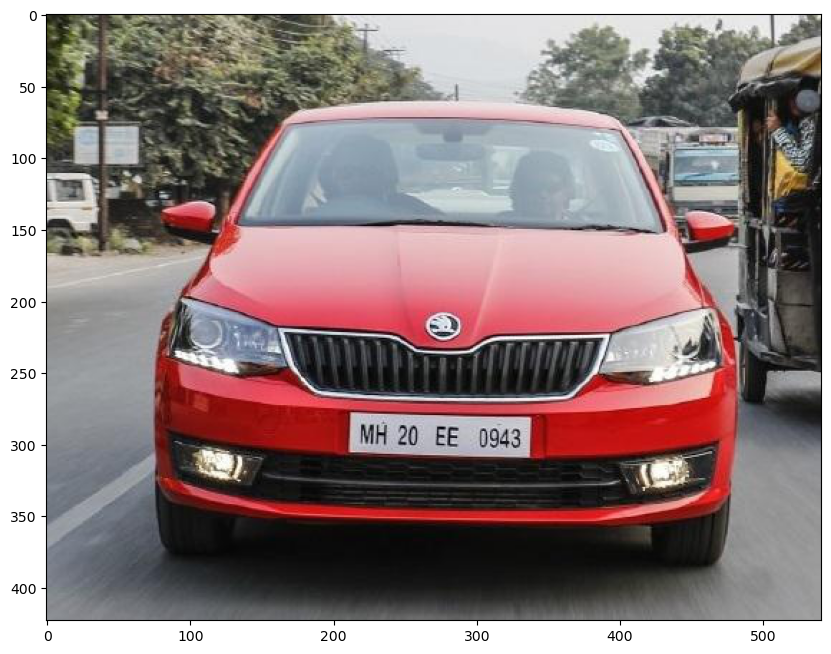

In [11]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [12]:
image_arr_224.shape

(224, 224, 3)

In [13]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [15]:
# prediction
coords = model.predict(test_arr)
coords

1/1 [==============================] - 0s 68ms/step


array([[0.4038778 , 0.62207025, 0.67173195, 0.73575103]], dtype=float32)

In [16]:
# denormalizzazione dei valori
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[218.49788696, 336.54000682, 284.14261436, 311.22268689]])

In [17]:
coords = coords.astype(np.int32)
coords

array([[218, 336, 284, 311]], dtype=int32)

(218, 284) (336, 311)


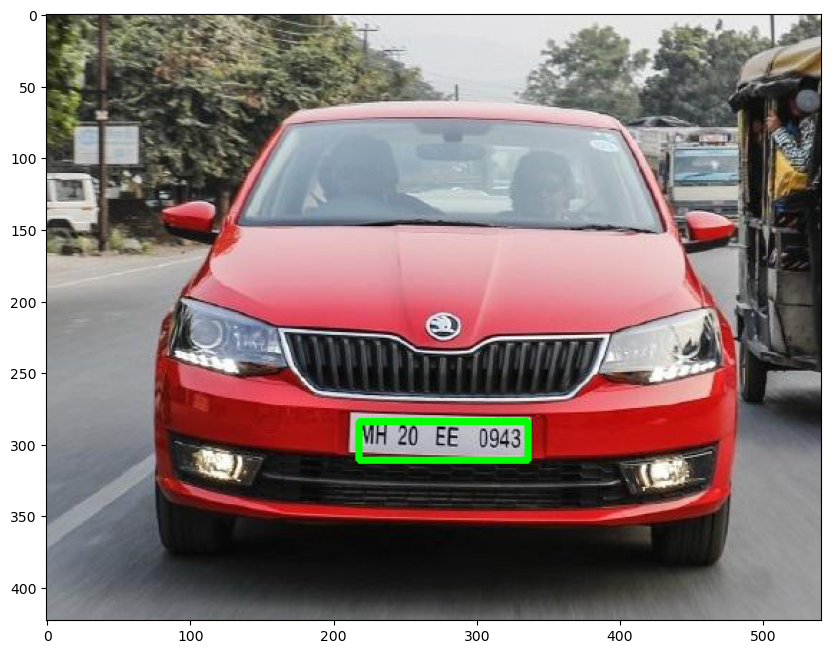

In [18]:
# disegniamo il contorno targa
xmin, xmax,ymin,ymax = coords[0]
pt1 =(xmin,ymin)
pt2 =(xmax,ymax)
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [19]:
def object_detection(path):
    # lettura dell'immagine
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    # preparazione dei dati
    image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    # predictions
    coords = model.predict(test_arr)
    # denormalizzazione dei valori
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    # disegniamo il contorno targa
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

1/1 [==============================] - 0s 69ms/step
(855, 1677) (1584, 1836)


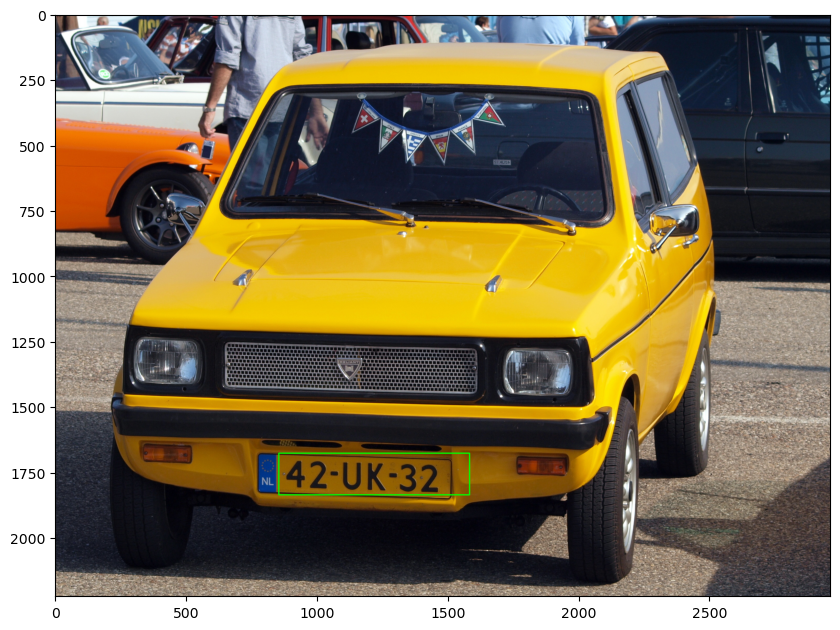

In [28]:
path = './test_images/N8.jpeg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

# Optical Character Recognition - OCR

In [36]:
import pytesseract as pt

1/1 [==============================] - 0s 151ms/step
(218, 284) (336, 311)


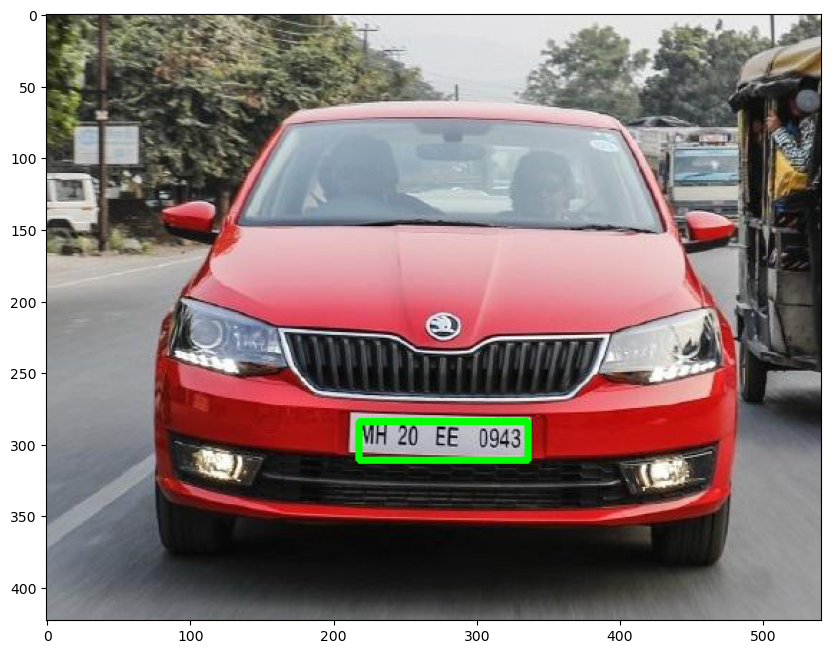

In [45]:
path = './test_images/N207.jpeg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [46]:
img = np.array(load_img(path))
xmin ,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

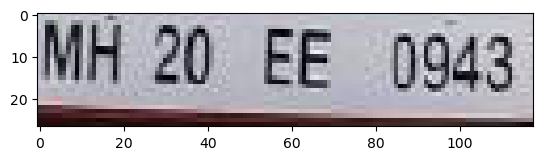

In [47]:
plt.imshow(roi)
plt.show()

In [48]:
# estrarre il testo dall'immagine
text = pt.image_to_string(roi)
print(text)

MH 20 EE 0943



In [51]:
# applicare contrasto all'immagine
def apply_brightness_contrast(input_img, brightness = 0, contrast = 0):
    
        if brightness != 0:
            if brightness > 0:
                shadow = brightness
                highlight = 255
            else:
                shadow = 0
                highlight = 255 + brightness
            alpha_b = (highlight - shadow)/255
            gamma_b = shadow
            
            buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
        else:
            buf = input_img.copy()
        
        if contrast != 0:
            f = 131*(contrast + 127)/(127*(131-contrast))
            alpha_c = f
            gamma_c = 127*(1-f)
            
            buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

        return buf

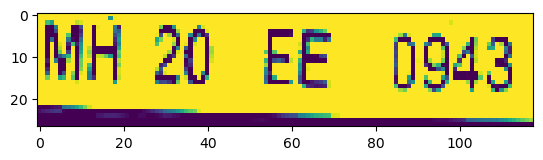

In [54]:
roi_bgr = cv2.cvtColor(roi,cv2.COLOR_RGB2BGR)
cv2.imshow('results',roi_bgr)
gray = cv2.cvtColor(roi_bgr,cv2.COLOR_BGR2GRAY)
magic_color = apply_brightness_contrast(gray,brightness=40,contrast=70)
plt.imshow(magic_color)
plt.show()

In [55]:
text = pt.image_to_string(magic_color,lang='eng',config='--psm 6')
text = text.strip()
print(text)

MH 20 EE 0943
